In [1]:
cd ../..

C:\Users\abcd2\OneDrive\Documents\GitHub\strong_lensing_vit_resnet


In [2]:
%pylab inline

import seaborn as sns

from pathlib import Path
from predict import BayesianInference

Populating the interactive namespace from numpy and matplotlib


In [3]:
# vit
dir_output = Path("C:/Users/abcd2/Dropbox/eccv_saved_models/vit_1__lr_1em3__dp_1em1__no_dp_attn")
dir_pred = Path("C:/Users/abcd2/Downloads/vit_no_dp_attn__pred_1000")

bi_vit = BayesianInference(dir_pred, dir_output)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.15it/s]


In [4]:
# resnet
dir_output = Path("C:/Users/abcd2/Dropbox/eccv_saved_models/resnet152_1__lr_1em3__dp_1em1")
dir_pred = Path("C:/Users/abcd2/Downloads/resnet__pred_1000")

bi_resnet = BayesianInference(dir_pred, dir_output)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.92it/s]


In [11]:
targets = [
    'theta_E',
    'gamma',
    'center_x',
    'center_y',
    'e1',
    'e2',
    'lens_light_R_sersic',
    'lens_light_n_sersic',
]

In [5]:
# vit
dir_output = Path("C:/Users/abcd2/Dropbox/eccv_saved_models/vit_1__lr_1em3__dp_1em1__no_dp_attn")
dict_posterior_vit = np.load(f"{dir_output}/posterior.npy", allow_pickle=True).item()

In [6]:
# resnet
dir_output = Path("C:/Users/abcd2/Dropbox/eccv_saved_models/resnet152_1__lr_1em3__dp_1em1")
dict_posterior_resnet = np.load(f"{dir_output}/posterior.npy", allow_pickle=True).item()

In [41]:
def plot_posterior(i_test_sample, targets_list, dict_posterior):    
    
    sns.set(style="whitegrid", font_scale=1)
    fig, ax = plt.subplots(1, 8, figsize=(24, 3))
    plt.subplots_adjust(wspace=0.3)


    for j in range(8):
        itarget = j
        target = targets_list[itarget]

        posterior = dict_posterior[f"{target}____posterior"][:, i_test_sample]
        truth = dict_posterior[f"{target}____truth"][i_test_sample]

        ax[j].hist(posterior, bins=20, histtype='step', lw=3, label='posterior')
        ax[j].axvline(truth, color='k', lw=3, label=f'truth = {truth:0.2f}')

        ax[j].legend(loc=8)
        ax[j].set_xlabel(target)
        ax[j].set_ylabel('count')
        ax[j].set_title(f"mean = {posterior.mean():0.2f}; std = {posterior.std():0.2f}")

In [42]:
def compare_two_models(i_test_sample):
    plot_posterior(i_test_sample, targets, dict_posterior_vit)
    plot_posterior(i_test_sample, targets, dict_posterior_resnet)

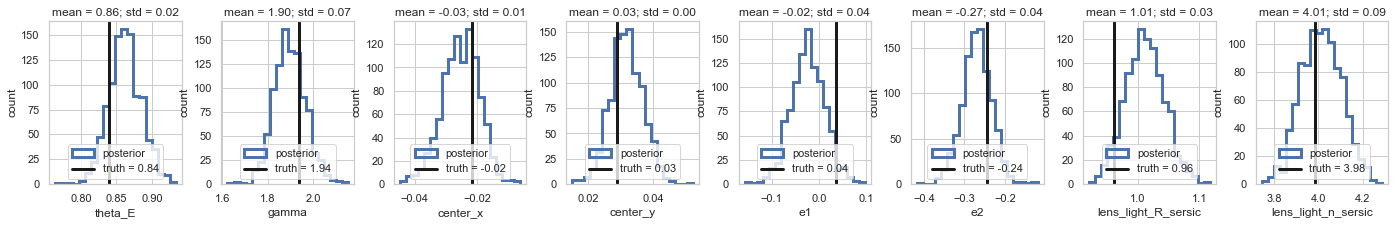

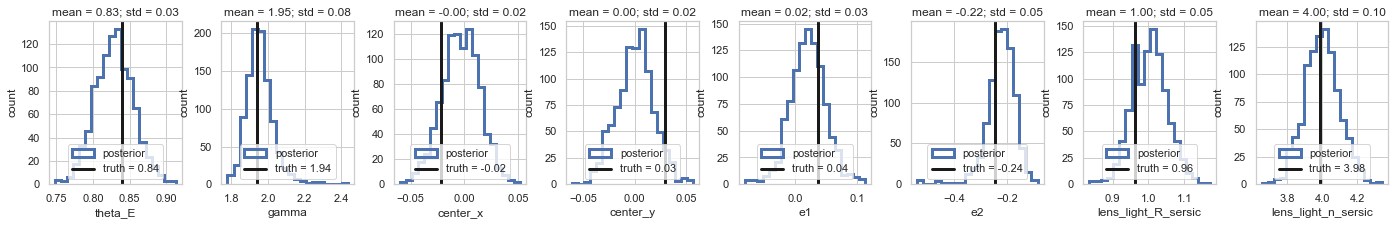

In [43]:
compare_two_models(i_test_sample=0)

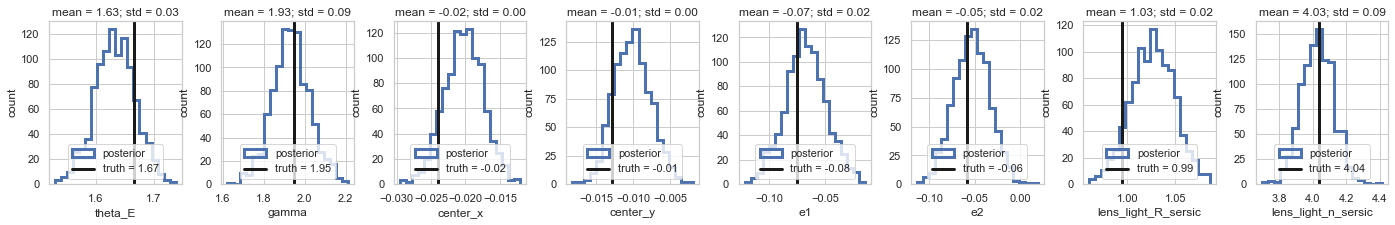

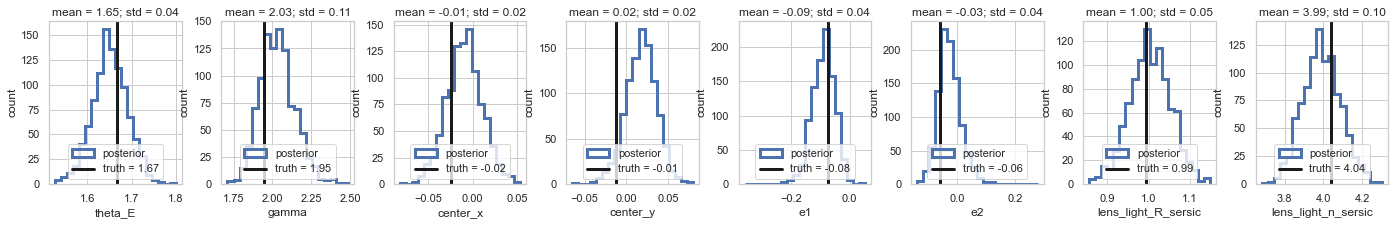

In [44]:
compare_two_models(i_test_sample=1)

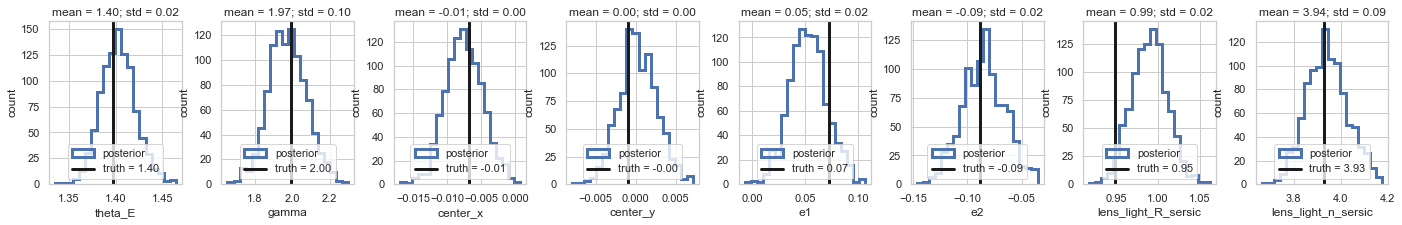

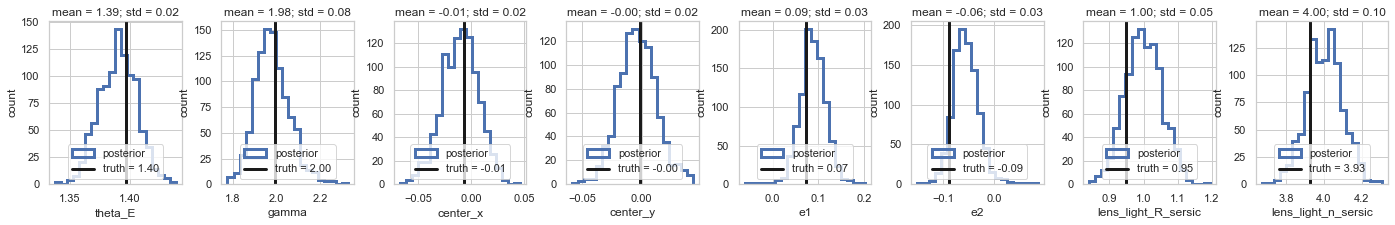

In [45]:
compare_two_models(i_test_sample=2)

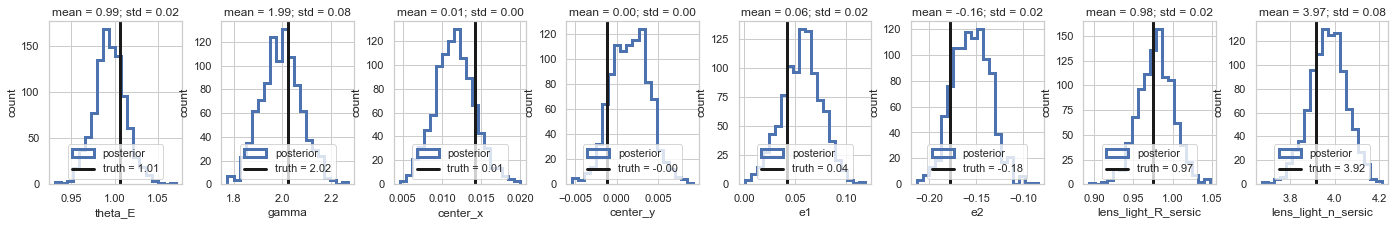

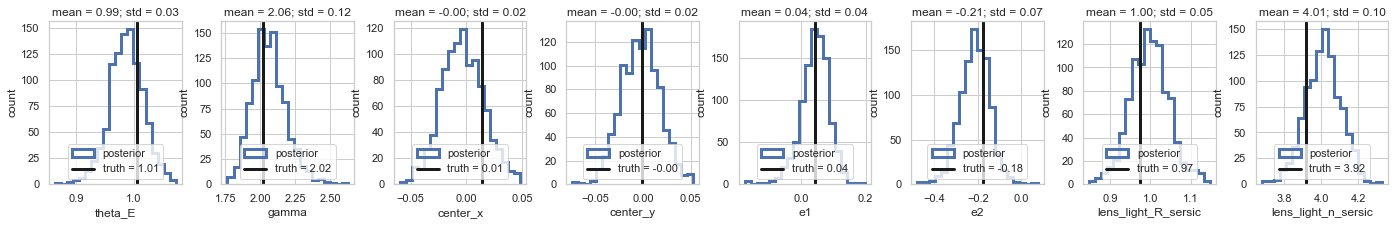

In [46]:
compare_two_models(i_test_sample=3)

In [63]:
def plot_predictions(targets_list, dict_posteriors, nsample, n_total_sample=1200):
    
    sns.set(style="whitegrid", font_scale=1)
    fig, ax = plt.subplots(2, 4, figsize=(18, 9))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    dict_alpha = {
        "resnet": 0.5,
        "vit": 1,
    }
    index = np.linspace(1, n_total_sample - 1, nsample).astype(int)
    
    for tag, dict_posterior in dict_posteriors.items():
    
        for r in range(2):
            for c in range(4):
                itarget = 4 * (r % 2) + c
                target = targets_list[itarget]

                truth = dict_posterior[f"{target}____truth"][index]
                posterior = dict_posterior[f"{target}____posterior"]
                
                pred = np.mean(posterior, axis=0)[index]
                sigma = np.std(posterior, axis=0)[index]
                
                xymin = min(min(truth), min(pred))
                xymax = max(max(truth), max(pred))

                ax[r, c].plot([xymin, xymax], [xymin, xymax], 'k--', alpha=0.5, lw=1)
                ax[r, c].errorbar(truth, pred, yerr=sigma, fmt='.', label=tag, 
                                  lw=1, ms=2
                                  , alpha=dict_alpha[tag]
                                 )

                ax[r, c].legend()
                ax[r, c].set_title(target)
                ax[r, c].set_xlabel('truth')
                ax[r, c].set_ylabel('prediction')


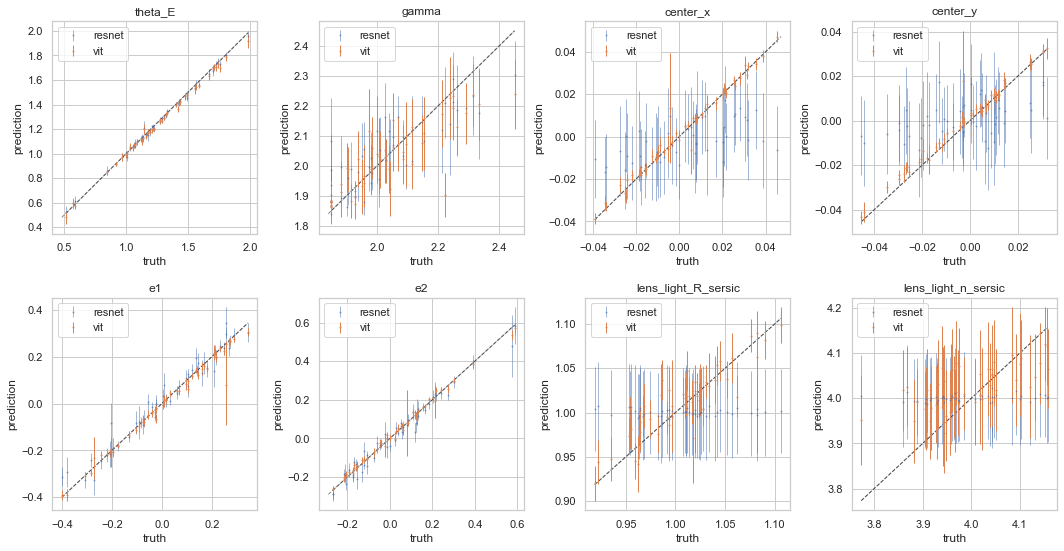

In [66]:
dict_posteriors = {
    "resnet": dict_posterior_resnet,
    "vit": dict_posterior_vit, 
}
plot_predictions(targets, dict_posteriors, 50)